# Material de Apoio: Análise de Dados {reprograma}

Nesse notebook encontram-se as análises e gráficos utilizados para construir a apresentação solicitada pela equipe de Relacionamento a fim de mostrar a importância da {reprograma} para investidores. Os materiais estão divididos por momento da apresentação:
1. Introdução;
2. Perfil Socioeconômico Inicial;
3. O Impacto do Curso na Renda e Emprego,
4. Conclusão.



## 1. Introdução:

**1.1. Tabela do IBGE(1) com rendimento mensal médio da população dividido por gênero, de janeiro de 2019 a junho de 2023 (2020 e 2021 não disponibizados devido à pandemia de COVID-19).**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dados_ibge = pd.read_excel('/content/drive/MyDrive/Dados/Tabela 5436.xlsx')
dados_ibge

,"Tabela 5436 - Rendimento médio mensal real das pessoas de 14 anos ou mais de idade ocupadas na semana de referência com rendimento de trabalho, habitualmente e efetivamente recebidos no trabalho principal e em todos os trabalhos, por sexo",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Trimestre,Homens,Mulheres,Total
1,1º trimestre 2019,3124,2462,2844
2,2º trimestre 2019,3088,2425,2806
3,3º trimestre 2019,3102,2421,2813
4,4º trimestre 2019,3123,2442,2834
5,1º trimestre 2020,3178,2459,2875
6,2º trimestre 2022,2939,2304,2670
7,3º trimestre 2022,3031,2401,2763
8,4º trimestre 2022,3115,2421,2819
9,1º trimestre 2023,3111,2475,2841


Com essa tabela que retiramos do site do IBGE, vimos que no contexto geral do Brasil,o rendimento médio mensal dos homens é maior do que o das mulheres em todos os períodos apurados.
Abaixo vamos realizar algumas manipulações nessa tabela para adequá-la para análise.

In [ ]:
# exluindo a primeira linha para melhorar a visualização
dados_ibge.columns = dados_ibge.iloc[0]
dados_ibge = dados_ibge[1:].reset_index(drop=True)

In [ ]:
dados_ibge

,Trimestre,Homens,Mulheres,Total
0,1º trimestre 2019,3124,2462,2844
1,2º trimestre 2019,3088,2425,2806
2,3º trimestre 2019,3102,2421,2813
3,4º trimestre 2019,3123,2442,2834
4,1º trimestre 2020,3178,2459,2875
5,2º trimestre 2022,2939,2304,2670
6,3º trimestre 2022,3031,2401,2763
7,4º trimestre 2022,3115,2421,2819
8,1º trimestre 2023,3111,2475,2841
9,2º trimestre 2023,3107,2473,2836


In [ ]:
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Trimestre  10 non-null     object
 1   Homens     10 non-null     object
 2   Mulheres   10 non-null     object
 3   Total      10 non-null     object
dtypes: object(4)
memory usage: 448.0+ bytes


In [ ]:
# transformar colunas do tipo texto para o tipo numérico
colunas_para_converter = ['Homens', 'Mulheres', 'Total']
dados_ibge[colunas_para_converter] = dados_ibge[colunas_para_converter].astype(int)
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Trimestre  10 non-null     object
 1   Homens     10 non-null     int64 
 2   Mulheres   10 non-null     int64 
 3   Total      10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


In [ ]:
dados_ibge.describe()

,Homens,Mulheres,Total
count,10.000000,10.00000,10.000000
mean,3091.800000,2428.30000,2810.100000
std,64.757325,50.28596,57.260516
min,2939.000000,2304.00000,2670.000000
25%,3091.500000,2421.00000,2807.750000
50%,3109.000000,2433.50000,2826.500000
75%,3121.000000,2461.25000,2839.750000
max,3178.000000,2475.00000,2875.000000


Observamos nos resultados acima que a média salarial mensal da população brasileira nos últimos anos é de:
- Homens: R$ 3091,80

- Mulheres: R$ 2428,30


Sendo a média salarial feminina R$663,50 menor do que a média salarial masculina.

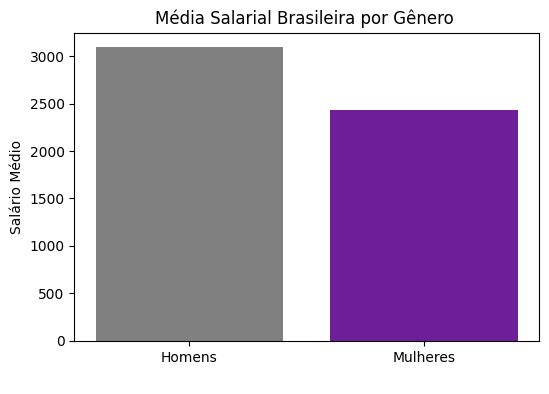

In [ ]:
# Calcular a média de cada coluna
media_homens = dados_ibge['Homens'].mean()
media_mulheres = dados_ibge['Mulheres'].mean()
medias= [media_homens, media_mulheres]
colunas= ['Homens', 'Mulheres']

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(colunas, medias, color=['gray', '#6e1e99'])
plt.ylabel('Salário Médio')
plt.xlabel(' ')
plt.title('Média Salarial Brasileira por Gênero ')
plt.xticks(rotation=0)
plt.show()

**1.2. Reportagens e informações sobre a participação das mulheres no mercado de tecnologia:**

> "De acordo com o relatório Global Gender Gap 2022, publicado pelo Fórum Econômico Mundial, a porcentagem de mulheres formadas em Tecnologias da Informação e Comunicação (TIC) é de 1,7% em comparação com 8,2% dos homens formados e, em Engenharia e Manufatura, os números são de 24,6% para os homens e 6,6% para mulheres. Esse cenário mostra que ainda há um longo caminho a percorrer e que precisamos começar a incentivar as mulheres a considerarem os campos STEAM."

Fonte: https://www.gazetadopovo.com.br/vozes/gazzconecta-colab/mulheres-na-tecnologia-dados-mostram-o-impacto-da-diferenca-de-genero-no-setor/


>"Uma pesquisa do Instituto Brasileiro de Geografia e Estatística (IBGE) aponta que apenas 20% dos profissionais que atuam nesta área são mulheres. A porcentagem foi confirmada pelo levantamento da Pesquisa Nacional por Amostra de Domicílios (PNAD), feita com mais de 580 mil profissionais de TI que atuam no Brasil e no mundo. O último censo dos Estados Unidos, por exemplo, aponta que as mulheres ocupam apenas 25% dos empregos em TI. Em 2019, a gigante Google também revelou que apenas 30% do seu quadro de funcionários é formado por mulheres."

Fonte: https://v1.go.senac.br/faculdade/site/noticia/5847-mulheres-sao-so-20-da-forca-de-trabalho-no-mercado-de-ti


Relatório "Quem Coda", publicado em 2019 com informações sobre o perfil dos profissionais de tecnologia no Brasil e a taxa de empregabilidade de Mulheres negras: https://www.pretalab.com/report-quem-coda






## 2. Perfil Socioeconômico Inicial

**Qual era a renda mensal per capita da sua casa antes do curso {reprograma}?**

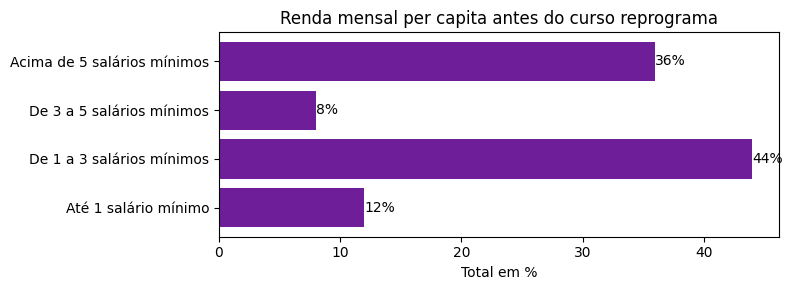

In [ ]:
# Dados para a pergunta 1
labels_pergunta1 = ['Até 1 salário mínimo', 'De 1 a 3 salários mínimos', 'De 3 a 5 salários mínimos', 'Acima de 5 salários mínimos']
porcentagens_pergunta1 = [12, 44, 8, 36]

# Criando os gráficos de barras
plt.figure(figsize=(8, 3))
plt.barh(labels_pergunta1, porcentagens_pergunta1, color='#6e1e99')

plt.xlabel('Total em %')
plt.title('Renda mensal per capita antes do curso reprograma')

# Adicionando os valores no final das barras
for i, v in enumerate(porcentagens_pergunta1):
    plt.text(v, i, f'{v:.0f}%', ha='left', va='center')

plt.tight_layout()
plt.show()


**Você estava empregada antes do curso {reprograma}? Em outra área ou na área de tecnologia?**


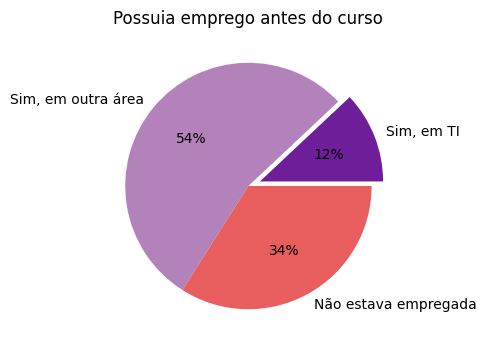

In [ ]:
labels = ['Sim, em TI','Sim, em outra área','Não estava empregada']
porcentagens = [12, 54, 34]
explode = (0.1, 0, 0)
# Criando o gráfico de pizza
plt.figure(figsize=(6, 4))
plt.pie(porcentagens, labels=labels, autopct='%.0f%%', explode= explode, colors=['#6e1e99', '#b382ba', '#e85d5d'])

plt.title('Possuia emprego antes do curso')
plt.show()


**Antes do curso {reprograma}, sua renda era suficiente para garantir a sua
subsistência?**

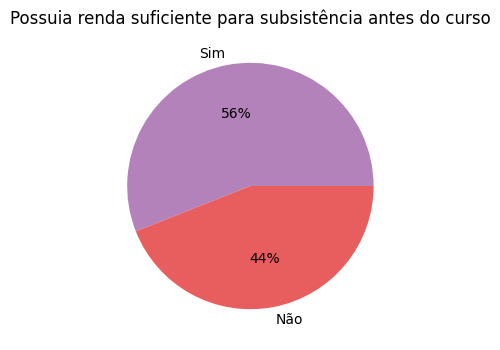

In [ ]:
labels = ['Sim','Não']
porcentagens = [56, 44]

# Criando o gráfico de pizza
plt.figure(figsize=(6, 4))
plt.pie(porcentagens, labels=labels, autopct='%.0f%%', colors=['#b382ba', '#e85d5d'])

plt.title('Possuia renda suficiente para subsistência antes do curso')
plt.show()

## 3. O Impacto do Curso na Renda e Emprego

**Comparativo entre a renda mensal per capita antes do curso e atualmente.**

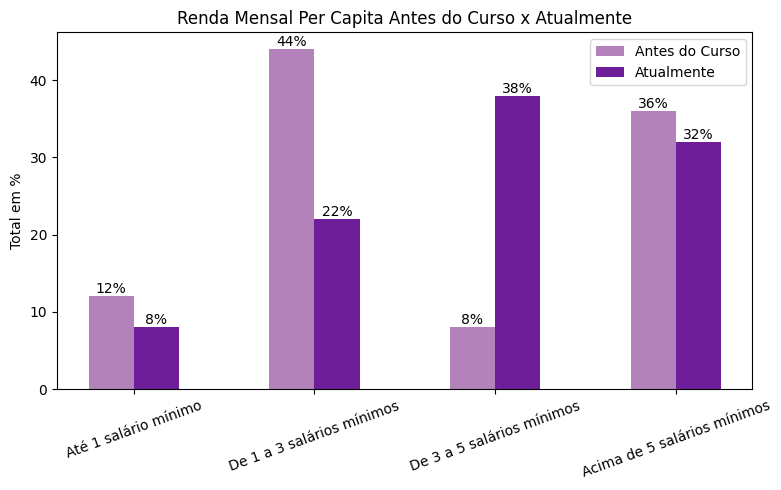

In [ ]:
# Categorias
categorias = ['Até 1 salário mínimo', 'De 1 a 3 salários mínimos', 'De 3 a 5 salários mínimos', 'Acima de 5 salários mínimos']

# Posição no eixo x para as barras
x = np.arange(len(categorias))

# Largura das barras
largura_barra = 0.25

# Dados para as perguntas
porcentagens_antes = [12, 44, 8, 36]
porcentagens_depois = [8, 22, 38, 32]

# Criar gráfico de barras
plt.figure(figsize=(8, 5))

# Plotagem das barras
barra1 = plt.bar(x - largura_barra/2, porcentagens_antes, largura_barra, label='Antes do Curso', color='#b382ba')
barra2 = plt.bar(x + largura_barra/2, porcentagens_depois, largura_barra, label='Atualmente', color='#6e1e99')

plt.ylabel('Total em %')
plt.title('Renda Mensal Per Capita Antes do Curso x Atualmente')
plt.xticks(x, categorias, rotation=20)
plt.legend()

# Adicionar os valores no final das barras
for barra in barra1:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f'{yval:.0f}%', ha='center', va='bottom')

for barra in barra2:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f'{yval:.0f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Considerações: Vemos que 56% das alunas possuiam renda per capita de até 3 salários mínimos antes do curso, e que esse percentual caiu para 30%, aumentando consideravelmente a quantidade de alunas com renda per capita de 3 a 5 salários mínimos (de 8% para 30%).

A diminuição percentual de alunas com renda acima de 5 salários mínimos pode ter se dado por diversos fatores, entre eles:
- Mudança de carreira e início de uma nova carreira em tecnologia.
- Mudança na empregabilidade de outras pessoas do domicílio (outras pessoas da residência podem ter perdido o emprego e com isso a renda per capita diminuiu).

**Comparativo de Empregabilidade antes do curso e atualmente:**
- Não estava empregada antes do curso x Não está empregada atualmente.
- Estava empregada em outra área antes do curso x Está empregada em outra área atualmente.
- Estava trabalhando em TI antes do curso x Está trabalhando em TI atualmente.


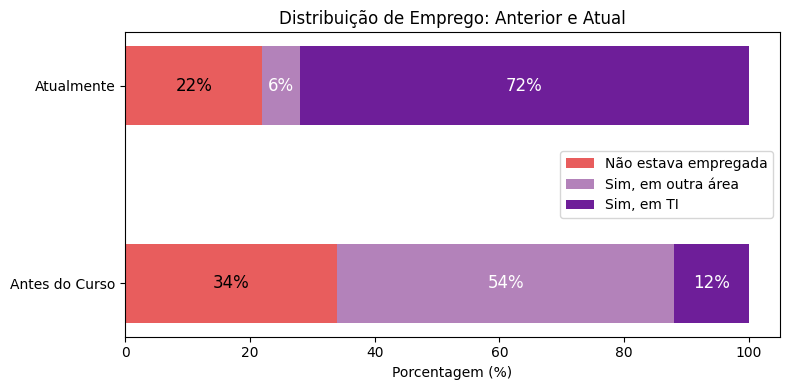

In [ ]:
# Dados
labels = ['Antes do Curso', 'Atualmente']
nao_empregada = [34, 22]  # Soma de "Não estava empregada" para Anterior e Atual
sim_outra_area = [54, 6]  # Soma de "Sim em outra área" para Anterior e Atual
sim_ti = [12, 72]  # Soma de "Sim em TI" para Anterior e Atual
largura_barra = 0.4

# Posição para as barras
posicao = np.arange(len(labels))

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(8, 4))
plt.barh(posicao, nao_empregada, height = largura_barra, color='#e85d5d', label='Não estava empregada')
plt.barh(posicao, sim_outra_area, left=nao_empregada, height = largura_barra, color='#b382ba', label='Sim, em outra área')
plt.barh(posicao, sim_ti, left=np.add(nao_empregada, sim_outra_area), height = largura_barra, color='#6e1e99', label='Sim, em TI')

# Adicionar os valores percentuais dentro das colunas
for i in range(len(posicao)):
    plt.text(nao_empregada[i] / 2, posicao[i], f'{nao_empregada[i]:.0f}%', ha='center', va='center', color='black', fontsize=12)
    plt.text(nao_empregada[i] + sim_outra_area[i] / 2, posicao[i], f'{sim_outra_area[i]:.0f}%', ha='center', va='center', color='white', fontsize=12)
    plt.text(nao_empregada[i] + sim_outra_area[i] + sim_ti[i] / 2, posicao[i], f'{sim_ti[i]:.0f}%', ha='center', va='center', color='white', fontsize=12)

plt.xlabel('Porcentagem (%)')
plt.title('Distribuição de Emprego: Anterior e Atual')
plt.yticks(posicao, labels)
plt.legend(loc='upper left')
plt.tight_layout()
plt.legend()
plt.show()


Nesse gráfico, notamos que após participar da {reprograma}, a situação das alunas mudou consideravelmente. Agora, 78% das alunas estão empregadas, com uma expressiva maioria (72%) trabalhando na área de TI.

**Calculando o Intervalo de Confiança:**

Vamos calcular os intervalos de confiança para as alunas que trabalhavam em TI antes do curso e para as alunas que trabalham com TI atualmente. Através desse cálculo, com base na nossa amostra, podemos estimar em que faixa de proporção a população provavelmente se encontra.

Temos que o tamanho da nossa amostra é de 4000 alunas e o intervalo de confiança é de 95%.

In [ ]:
from statsmodels.stats.proportion import proportion_confint

Para o total de alunas que trabalhavam com TI antes do curso:

In [ ]:
# utilizando os dados fornecidos: tamanho da amostra:4000, intervalo de confiança de 95%
# count= total de alunas que trabalhavam com TI antes do curso = 12% = 480
# nobs= tamanho da amostra
proportion_confint(count=480,nobs=4000,alpha=(1 - 0.95))

(0.1099295227091103, 0.1300704772908897)

Para o total de alunas que trabalham com TI atualmente:

In [ ]:
# utilizando os dados fornecidos: tamanho da amostra:4000, intervalo de confiança de 95%
# count= total de alunas que trabalham com TI atualmente = 72% = 2880
# nobs= tamanho da amostra
proportion_confint(count=2880,nobs=4000,alpha=(1 - 0.95))

(0.706085636034551, 0.733914363965449)

De acordo com nossos resultados, podemos estimar com 95% de confiança que:
- Entre 11% e 13% de todas as alunas da {reprograma} não trabalhavam com TI antes do curso;
- Entre 70% e 73% de toda as alunas da {reprograma} trabalham com TI após o projeto.
O fato dos intervalos de margem de erro antes e depois do curso não se sobreporem, implica que nosso resultado é estatisticamente significativo a 95% de confiança.

**Comparativo de antes do curso e atualmente da pergunta: Sua renda é suficiente para garantir a sua subsistência?**

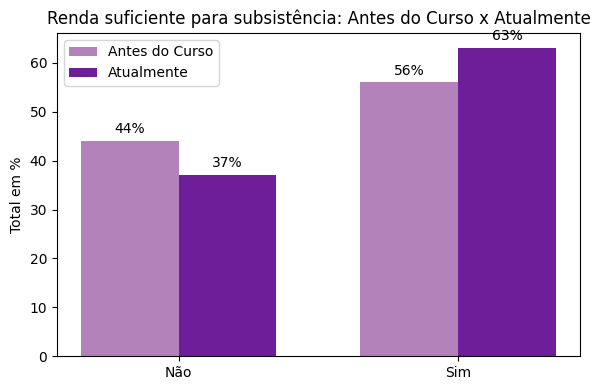

In [ ]:
labels = ['Não', 'Sim']
porcentagens_ant = [44, 56]
porcentagens_dep = [37, 63]

x = np.arange(len(labels)) # Posição das barras no eixo x

largura_barra = 0.35

plt.figure(figsize=(6, 4)) # Criar o gráfico de barras lado a lado

# Plotagem das barras
plt.bar(x - largura_barra/2, porcentagens_ant, largura_barra, label='Antes do Curso', color='#b382ba')
plt.bar(x + largura_barra/2, porcentagens_dep, largura_barra, label='Atualmente', color='#6e1e99')

plt.ylabel('Total em %')
plt.title('Renda suficiente para subsistência: Antes do Curso x Atualmente')
plt.xticks(x, labels)
plt.legend()

# Adicionar os valores nas barras
for i in range(len(x)):
    plt.text(x[i] - largura_barra/2, porcentagens_ant[i] + 1, f'{porcentagens_ant[i]:.0f}%', ha='center', va='bottom')
    plt.text(x[i] + largura_barra/2, porcentagens_dep[i] + 1, f'{porcentagens_dep[i]:.0f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Calculando o Intervalo de Confiança:**

Vamos calcular os intervalos de confiança para as alunas que possuiam renda suficiente para subsistência antes do curso e para as que possuem renda suficiente para subsistência atualmente. Através desse cálculo, com base na nossa amostra, podemos estimar em que faixa de proporção a população provavelmente se encontra.

Temos que o tamanho da nossa amostra é de 4000 alunas e o intervalo de confiança é de 95%.

Para o total de alunas que possuiam renda suficiente para subsistência antes do curso:

In [ ]:
# utilizando os dados fornecidos: tamanho da amostra:4000, intervalo de confiança de 95%
# count= total de alunas que possuiam renda para subsistência antes do curso 56% = 2240
# nobs= tamanho da amostra
proportion_confint(count=2240,nobs=4000,alpha=(1 - 0.95))

(0.5446170918433881, 0.575382908156612)

Para o total de alunas que possuem renda suficiente para subsistência atualmente:

In [ ]:
# utilizando os dados fornecidos: tamanho da amostra:4000, intervalo de confiança de 95%
# count= total de alunas que possuiem renda para subsistência atualmente 63% = 2520
# nobs= tamanho da amostra
proportion_confint(count=2520,nobs=4000,alpha=(1 - 0.95))

(0.6150380144106489, 0.6449619855893511)

De acordo com nossos resultados, podemos estimar com 95% de confiança que:
- Entre 54% e 57% de todas as alunas da {reprograma} possuiam renda suficiente para subsistência antes do curso;
- Entre 61% e 64% de toda as alunas da {reprograma} possuem renda suficiente para subsistência atualmente.

O fato dos intervalos de margem de erro antes e depois do curso não se sobreporem, implica que há uma diferença estatisticamente significativa entre a condição de renda das alunas antes do curso e a condição atual de renda das alunas. Essa diferença pode ser atribuída ao impacto da {reprograma} no contexto socioeconômico das alunas.

## Conclusão:

Antes de ingressar na {reprograma}, a grande maioria das alunas estava enfrentando desafios financeiros. Cerca de 56% das participantes relataram que a renda de suas famílias não era suficiente para garantir a subsistência, com 34% delas desempregadas. Além disso, apenas 12% possuíam emprego na área de TI, mostrando um cenário de desigualdade e falta de representatividade.

Após participar da {reprograma}, a situação mudou consideravelmente. Agora, 78% das alunas estão empregadas, com uma expressiva maioria (72%) trabalhando na área de TI. Isso reflete uma oportunidade de crescimento profissional significativa, e 63% delas afirmam que a renda atual é suficiente para garantir a subsistência, indicando uma melhora substancial na qualidade de vida.

Ao analisar os dados, percebemos que a {reprograma} está fazendo diferença real. O curso não apenas transforma a carreira das alunas, mas também suas condições socioeconômicas. Ao proporcionar acesso à educação e oportunidades no setor de TI, a {reprograma} está contribuindo para um futuro mais inclusivo e equitativo.

## Anexos:

1. Link para tabela do IBGE https://sidra.ibge.gov.br/tabela/5436#resultado
